# Random matrix valued stochastic processes

The multilinear generalization of a stochastic processes falls naturally in the domain of random matrix theory. The distributions of the process are now taken to be Gaussian Haar measures on $GL(N)^{k}$ where $k$ indexes time steps. Let's start by building a Gaussian unitary matrix valued random proc.

In [1]:
import os
if os.getcwd().split('\\')[-1] == 'nbs':
    os.chdir('../')
from rmt.ensembles import gue, ginibre
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_proc(generator, n_time, n_mat, *args):
    """
    Builds a stochastic proc valued in n by matrices of type given by the generator function. 
    The time interval is normalized to [0, 1] and the proc starts at 0
    """
    t = np.linspace(0, 1, n_time-1)
    gaussian_step = [np.zeros([n_mat, n_mat])]+[generator(n_mat, *args) for _ in range(0, len(t))]
    return np.cumsum(gaussian_step, axis=0), t
n = 10
w, t = build_proc(gue, 100, n)
w.shape

(100, 10, 10)

The process w is matrix valued in that $w(t)\in U(N)$ $\forall t\in [-, 1]$. A standard feature of all standard random ensembles is level repulsion: The spacing of eigenvalues are distributed in such a way that $|\lambda_i-\lambda_{i+1}|>0$. Then, it must be that the spectrum of the Brownian motion just constructed must exhibit level repulsion as well. In other words, we expect the spectral paths to be non-intersecting for any $N>1$:

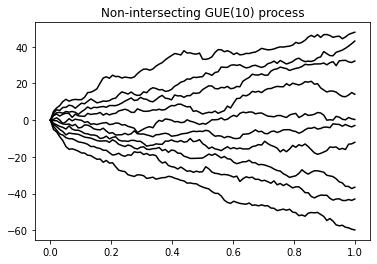

In [3]:
w_spec = [np.linalg.eigvalsh(h) for h in w]
plt.plot(t, w_spec[:-1], 'k')
plt.title(f"Non-intersecting GUE({n}) process");

The figure above is reminiscent of one of the most fruitful algorithms (due to David Ceperly [[1]](https://link-springer-com.proxy2.library.illinois.edu/article/10.1007/BF01030009)) that attempts to circumvent the Fermion sign problem where the fact that two Fermions pick up a sign under exchange renders the path integral non-statistical. The algorithm seeks to evaluate the path integral in nodal regions where paths do not cross. The nodal structure can roughly be understood as a geometric representation of Fermionic statistics and must be computed self-consistently (so the problem remains NP hard but is still statistical)

If on where to attempt some form of stochastic quantization by exploring configuration space with GUE procs, I suspect we would find that we would explore a single nodal region where the groundstate wavefunction(al) does not change sign - A portion of configuration space where Fermions are never exchanged. There may be some application to the sign problem here but I don't have the time to think through it

## Non-intersecting Brownian bridge

It might be interesting to be able to simulate a process that attains a fixed value at times $t=0$ and $t=1$ that does so without self intersection. The standard construction of a Brownian bridge from a process $W(t)$ is via
$$
B(t)\equiv W(t)-tW(1)
$$
so that $B(0)=B(1)$.

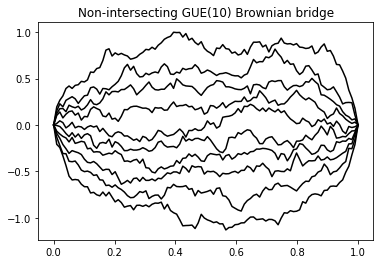

In [4]:
t = np.linspace(0, 1, 100)
b = w-np.tile(t, (n**2,1)).T.reshape(len(t), n, n)*w[-1, :,:]
b_spec = np.array([np.linalg.eigvalsh(h) for h in b])
b_spec /= b_spec.max()

plt.title(f"Non-intersecting GUE({n}) Brownian bridge");
plt.plot(t,b_spec, 'k');

### Airy scaling

Now introduce the coordinate reparameterization
$$
(x, t) = \left(\frac{\sqrt{2n}}{2\cosh \sigma}, \frac{e^{\sigma}}{2\cosh\sigma}\right)
$$
...
TODO: Fredholm determinant procs.  

## Determinantal point processes

The eigenvalues of the complex Ginibre ensemble furnish examples of what are called determinantal point processes. A point process is simply a point cloud with a probability measure. The standard example is the point cloud $X$ with the Poisson measure. The characterisitc feature is of course $A\sqcup B\implies \mu(A\sqcup B)=\mu(A)\mu(B)$ for $A,B\in X$. That is, the process on $X$ restricts independently to partitions of $X$.   

This independent sampling is sometimes a feature and other times a bug. Nature tends to assign point clouds non-independent measures in the form of statistical repulsion or attraction. For instance, in quantum mechanics,two generic states drawn from a large ensemble will cross only at a point of measure 0 (else, they are said to belong to different (supser)selection sectors). The opposite case of clustering is the most natural - complex systems modelled stochastically inherit the underlying coupling of degrees of freedom. For instance, if a node in a large complex network fails randomly, it is liklier for a nearby node to fail  compared to a distant one. 

### Following Borodin's exposition in [[2]](https://www.oxfordhandbooks.com/view/10.1093/oxfordhb/9780198744191.001.0001/oxfordhb-9780198744191)

We will focus on determinantal point processes that give rise to repulsive statistics on the point cloud. Let $X$ ba a point cloud and $2^X$ its power set. The point process on $X$ is determinatal if $\exists$ an $|X|\times|X|$ matrix K s.t. for any $Y\subset X$,
$$
\mathbb P(A\in 2^X|Y\subset X)=\det[K(y_i, y_j)]_{i,j}^{|Y|}.
$$
If the determinant is replaced by a permanent we get a clustered point process exhibiting attraction rather than repulsion. The subset $Y$ is typically called a *window*. Suppose one can define a sequence of measures, $\{\rho_n\}$ s.t. $\rho_m$ is a measure on $X^m$ and 

$$
\int_{X^n}\rho_n f = \left\langle \sum_{y_1,...,y_n}f(y_1,...,y_n)\right\rangle
$$
This correlation measure is distinct from the natural measure $\mu$ (a counting measure) on $X$ but has densities relative to $\mu^{\otimes n}$. This is so that we read 
$$
\rho_n(y_1,...,y_n)\mu(dy_1)...\mu(dy_n)
$$
as the probability that there exists a particle at $y_i$. Because we said the process was determinantal, 
$$
\rho_n(y_1,...,y_n)=\det[K(y_i, y_j)]_{i,j}^{|Y|}
$$
where $K:X\times X\to\mathbb C$ is now appropriately termed the correlation kernel.

### GUE spectra

The spectrum sampled from GUE(N) represents a determinantal point process on $\mathbb R$ ($\mathbb Q$ on a computer) with kernel
$$
K_n(y_i, y_j)=\sum_{k=0}^{n-1}\psi_k(y_i)\psi_k(y_j)
$$
where $\psi_k(x)$ is the $k$-th excited stat of the simple Harmonic oscillator. The stochastic repulsion exhibitted here is exactly the level repulsion effect of coupled harmonic oscillators where level spacing is inversely propertional to coupling strength.  


### Complex Ginibre spectra

A Hermitian kernel is a bit of an oddity outside the scope of quantum mechanics so consider instead the spectra drawn from the complex Ginibre ensemble which is simply a normalized complex Gaussian ensemble. This defines a determinantal point process on $\mathbb C$ ($\mathbb Q^2$ on a computer) with kernel
$$
K(z_1, z_2)=\frac{1}{\pi} e^{z_1\bar z_2}e^{-\frac{1}{2}z\cdot z}
$$


In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

In [13]:
wg, t = build_proc(ginibre, 600, 150)
w_spec = [np.linalg.eigvals(h) for h in wg]
fig, ax = plt.subplots()
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
# ax.axis('equal')
plots = [ax.plot([],[], marker=".")[0] for i in range(len(w_spec[0][:]))]
def animate(t):
    for i in range(len(w_spec[0][:])):
        plots[i].set_data([np.real(w_spec[t][i])] ,[np.imag(w_spec[t][i])])
    return plots
ani = animation.FuncAnimation(fig, animate, interval=100, repeat=True, frames=600)
# ani.save("nbs/complex-gini.mp4")
plt.close()
HTML(ani.to_html5_video())

### Real Ginibre

Ginibre envisioned complex, real and quaternionic versions of his ensemble, depending on the use case. However, the real ensemble (and quaternion one I believe) are not as well behaved theoretically. For example, for finite $N$, the real Ginibre spectrum is purely real with *finite* probability. In the complex case, the spectrum is complex almost surely. In any case, the result is still a valid DPP: 

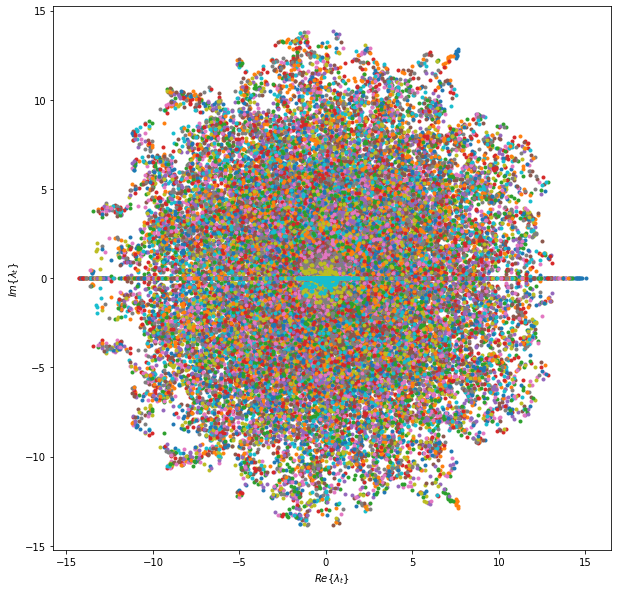

In [9]:
wg, t = build_proc(ginibre, 200, 200, False)
w_spec = [np.linalg.eigvals(h) for h in wg]
plt.figure(figsize=(10,10))
# plt.plot(np.sort(np.real(w_spec[:-1])), np.sort(np.imag(w_spec[:-1])), linewidth=0.2);
plt.plot((np.real(w_spec[:-1])), (np.imag(w_spec[:-1])), '.', linewidth=0.2, );
plt.xlabel(r"$Re\{\lambda_t\}$")
plt.ylabel(r"$Im\{\lambda_t\}$");



Notice the strong clustering on the real axis... This is no good for many applications

### Simulating DPP from a Kernel

In the examples above we could generate the DPP from a random ensemble. In general, we may only have access to the kernel. Suppose we know the decomposition
$$
K(x,y)=\sum_{k}\phi_k(x)\bar{\phi_k(y)}
$$
along with $\phi_k(x)$. Here is an algorithm adapted from the Ginibre versions from [[3]](https://arxiv.org/pdf/1310.0800.pdf). It seems generating a process from a general kernel is rather non-trivial. 

- Define $\phi_k(x)$ on a ball of radius $N$
- Assemble into fector $\nu(x) = (\phi_1(x),...,\phi_n(x))$
- Define custom density $\|\nu(x)\|^2/N$
- Draw $X_N$ from this distribution
- Set $e_1\equiv \nu(X_N)/|\nu(X_N)|$
- for $i=N01\to1$ do:
    - sample $X_i$ from density $\frac{1}{i}\left(\|v(x)\|^2-\sum_{j=1}^{N-i}|e^*_j\nu(x)|^2\right)$
    - set $w_i=\nu(X_i)-\sum_{j=1}^{N-i}e^*_j\nu(x)e_j$
    - set $e_{N-i+1}=w_i/\|w_i\|$
- return $(X_1,...,X_N)$

I have yet to test the scope of this generalization. I will also try out the naive approach as well.